The purpose of this notebook is to analyze the custom guide library that Aaron created.

The paper will have a figure describing this library, and that figure will be generated in this notebook

In [1]:
#set up the environment
library(tidyverse)
library(reshape2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
#Load in the gnomAD annotation file so that we know which sample belongs to each ancestry group
setwd("/home/jupyter/Ancestry/raw_data/hgdp")
sample.annotation = read.table("gnomad.genomes.v3.1.2.hgdp_1kg_subset_sample_meta.tsv.bgz", sep = "\t", header = T) %>%
select(s, gnomad_population_inference) %>%
mutate(gnomad_population_inference = gsub("\\..*pop", "", gnomad_population_inference)) %>%
mutate(gnomad_population_inference = gsub("prob..*", "", gnomad_population_inference)) %>%
mutate(gnomad_population_inference = gsub("..*:", "", gnomad_population_inference)) %>%
mutate(gnomad_population_inference = gsub(",", "", gnomad_population_inference)) %>%
rename("sample" = 1, "ancestry" = 2)

head(sample.annotation)

,sample,ancestry
,<chr>,<chr>
1,CHMI_CHMI3_WGS2,nfe
2,HG00096,nfe
3,HG00097,nfe
4,HG00099,nfe
5,HG00100,nfe
6,HG00101,nfe


In [3]:
#Load in Aaron's data
setwd("/home/jupyter/Ancestry/analysis/aaron_custom_guide_library")
custom.guides = read.table("final_custom_library.txt", header = T)
head(custom.guides)

,seq,chr,posL,posR,CHMI_CHMI3_WGS2,LP6005441.DNA_F08,HGDP00843,HGDP00392,LP6005441.DNA_H03,HGDP00544,⋯,HG00288,HG00290,HG00304,HG01765,HG01766,HG01767,HG01768,HG01785,HG01786,HG02219
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,AAAACTGCTACAATACTCCA,chr22,49925465,49925487,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,AAACACACCCAGCATCAACC,chr22,50423557,50423579,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,AAACACGATCAGGTCAATTC,chr22,41945939,41945961,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,AAAGAGGACAGCTCTGACAA,chr22,15695464,15695486,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,AAAGCAGCAGCATCCATGGT,chr22,21047999,21048021,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,AAAGCCGTCCTGTCCGACAT,chr22,39374523,39374545,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
#Calculate the number of guides in the library
tot.guides = nrow(custom.guides)

In [6]:
#calculate the number of affected guides per individual
guides.per.person = custom.guides %>%
select(-seq, -chr, -posL, -posR) %>%
apply(2, sum)
head(guides.per.person)

#Get a vector of the names
sample.names = colnames(custom.guides)[5:ncol(custom.guides)]
head(sample.names)

#Assemble everything into a single data frame
affected.guides.df = cbind(sample.names, guides.per.person) %>%
data.frame() %>%
rename("sample" = 1, "num_guides" = 2) %>%
inner_join(sample.annotation, by = "sample") %>%
mutate(num_guides = as.numeric(num_guides)) %>%
filter(ancestry != "NA") %>%
mutate(percent_guides = (num_guides/tot.guides)*100)

length(sample.names)
dim(affected.guides.df)
head(affected.guides.df)


CHMI_CHMI3_WGS2 LP6005441.DNA_F08         HGDP00843         HGDP00392 
              150               186               152               167 
LP6005441.DNA_H03         HGDP00544 
              165               200

[1] "CHMI_CHMI3_WGS2"   "LP6005441.DNA_F08" "HGDP00843"        
[4] "HGDP00392"         "LP6005441.DNA_H03" "HGDP00544"

[1] 4151

[1] 4010    4

,sample,num_guides,ancestry,percent_guides
,<chr>,<dbl>,<chr>,<dbl>
1,CHMI_CHMI3_WGS2,150,nfe,0.2035831
2,HGDP00843,152,amr,0.2062975
3,HGDP00392,167,sas,0.2266558
4,HGDP00544,200,oth,0.2714441
5,HGDP01053,169,amr,0.2293702
6,HGDP00191,173,sas,0.2347991


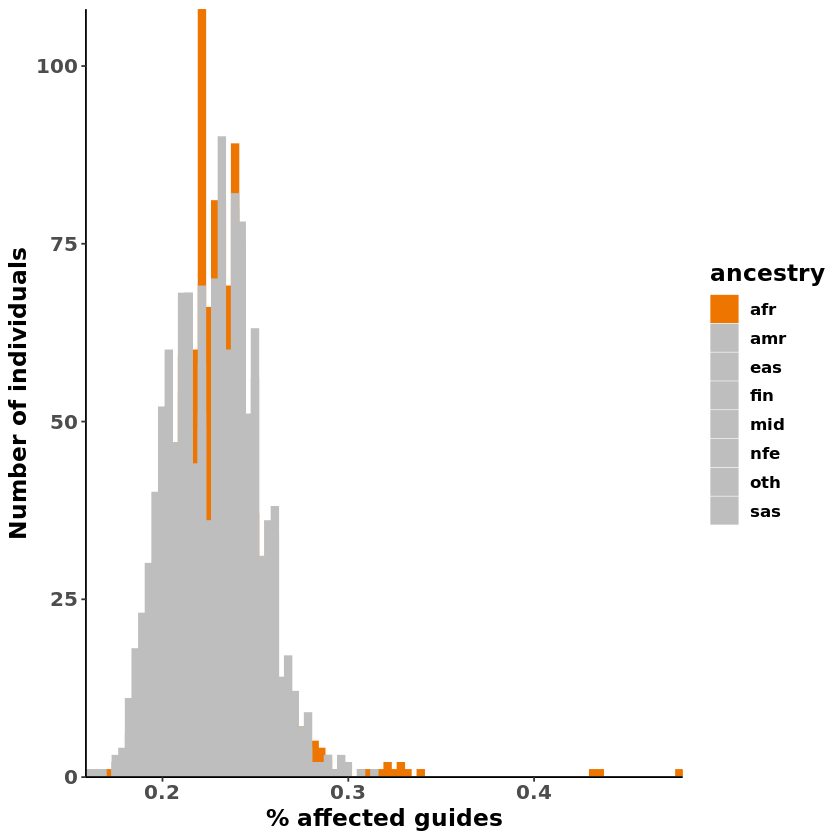

In [10]:
#Plot the data
affected.guides.df %>%
ggplot() +
geom_histogram(aes(x = percent_guides, color = ancestry, fill = ancestry), bins = 90, position="identity") +
theme_bw() +

scale_color_manual(values=c("darkorange2", "grey", "grey", "grey", "grey", "grey", "grey", "grey")) +
scale_fill_manual(values=c("darkorange2", "grey", "grey", "grey", "grey", "grey", "grey", "grey")) +

theme(
panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(color = "black")
) +

theme(
axis.title.x = element_text(color = "black", size = 14, face = "bold"),
axis.title.y = element_text(color = "black", size = 14, face = "bold")
) +

theme(
axis.text=element_text(size = 12, face = "bold"),
axis.title=element_text(size = 14,face = "bold")
) +

theme(
legend.title = element_text(size = 14, face = "bold"),
legend.text = element_text(size = 10, face = "bold")
) +

scale_y_continuous(expand = c(0,0)) +
scale_x_continuous(expand = c(0,0)) +

ylab("Number of individuals") +
xlab("% affected guides")



setwd("/home/jupyter/Ancestry/analysis/aaron_custom_guide_library")
ggsave("affected_guides_per_individual_aaron_library.pdf", width = 5, height = 3)
system(glue::glue("
cd /home/jupyter/Ancestry/analysis/aaron_custom_guide_library
gsutil cp affected_guides_per_individual_aaron_library.pdf gs://fc-45c0e148-0b1c-4244-9bfc-feb559bbc514
"))